#  Titanic Proyect

# Importing Libraries

In [2]:
import numpy as np # linear algebra                                                                                                           
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)                                                                        
import matplotlib.pyplot as plt # this is used for the plot the graph                                                                         
import seaborn as sns # used for plot interactive graph.                                                                                      
from pandas_profiling import ProfileReport

%matplotlib inline  

# Data Access

In [3]:
df = pd.read_csv("../train.csv", sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Modeling

Trying to predict a variable (usually target) using a dataset
* Simple and Multiple Linear Regression
* Model evaluation and visualization
* Polynomial regresion and pipelines
* R-squared and MSE for in-sample Evaluation
* Prediction and Decision making


# Simple and Multiple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

### Simple Linear Regression (SLR)

In [6]:
# Create a linear regression object using the Constructor
lm = LinearRegression()
X = df[["Pclass"]]
Y = df["Fare"]
lm.fit(X,Y) 
# Data Cleaning must be permored before data modeling, otherwise NaN values will produce errors in the data modeling step

#PREDICTING
Yhat = lm.predict(X)
# The result is an array of the predictor variable Yhat with same number of samples as the input dataset X
# The parameters are atributes of the object lm:
    #-intercept: lm.intercept_
    #-slope: lm.coef_

### Multiple Linear Regression (MLR)

In [7]:
# Predictor variables
Z = df[["Pclass","SibSp"]]
Y = df["Fare"]
lm.fit(Z,Y)

#PREDICTING
Yhat_1 = lm.predict(Z)
# The result is an array of the predictor variable Yhat with same number of samples as the input dataset X
# The parameters are atributes of the object lm:
    #-intercept: lm.intercept_
    #-slope: lm.coef_ (is an array)
print("interception ", lm.intercept_, " slope ",lm.coef_)

interception  105.09009459271873  slope  [-33.68137625   9.31602138]


# Model Evaluation using Visualization

### Regression plot

(0, 537.9994225436561)

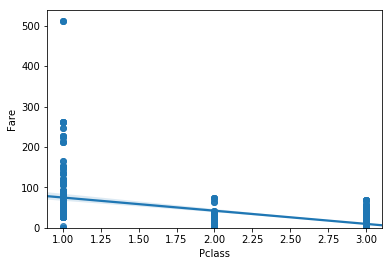

In [8]:
sns.regplot("Pclass","Fare",df)
plt.ylim(0,)

### Residual Plot

 It represents the error between the error and actuall value
 We expect a zero mean, distributed evenly around the x axis with similar variance. There is no curvature
 The values of the error must not change with x. Otherwise it is not a good model

(0, 463.0005267519375)

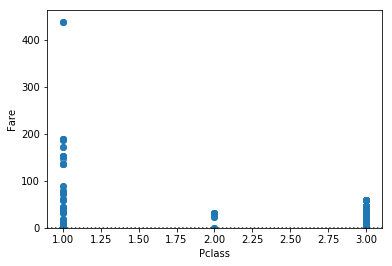

In [9]:
sns.residplot("Pclass","Fare",df)
plt.ylim(0,)

### Distribution Plots

These plots are extremely useful for visualizing models with more than one independent variable or feature.
It is a plot that shows two distributions: the actual value and the predicted one. 

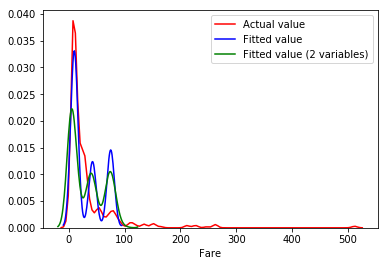

In [9]:
ax1 =sns.distplot(df["Fare"],hist=False,color="r",label="Actual value")
sns.distplot(Yhat,hist=False,color="b",label="Fitted value")
sns.distplot(Yhat_1,hist=False,color="g",label="Fitted value (2 variables)")

# Polynomial Regression and Pipelines

We transform our data into a polynomial, then use linear regression to fit the parameter. This method is beneficial for describing curvilinear relationships.

Example of a 3th order polynomial:
    - f = np.polyfit(x,y,3)
    - p = np.poly1d(f)

We can also have multipolynomial linear regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
pr=PolynomialFeatures(degree=2,include_bias=False)
#pr.fit_transform([1,2], include_bias=False) # we transform the features into a polynomial feature 

We can use the preprocessing module to simplify many tasks

In [12]:
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(df[["Age","Fare"]])
x_scale = SCALE.transform(df[["Age","Fare"]]) 

# Pipelines

There are many steps to get in a prediction:
* For Example:
    - Normalization -> Plynomial transform -> Linear Regression
We simplify the process using the pipeline

First, we import all the modules

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Second, we create a list of tuples:

In [14]:
input=[("scale",StandardScaler()),("polynomial",PolynomialFeatures(degree=2)),("mode",LinearRegression())]

Third. Put the list in the pipeline constructor

In [15]:
pipe=Pipeline(input)

We can train the pipeline

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


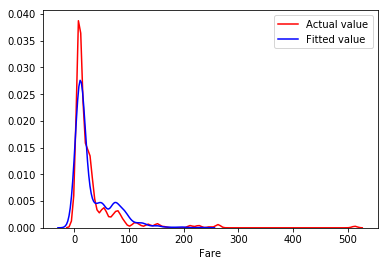

In [16]:
X = df[["Pclass","SibSp","Parch","Survived"]]
Y = df["Fare"]
pipe.fit(X,Y) # The method normalizas the data, performs a polynomial transform and then outputs the prediction
Yhat = pipe.predict(X)

ax1 =sns.distplot(df["Fare"],hist=False,color="r",label="Actual value")
sns.distplot(Yhat,hist=False,color="b",label="Fitted value")

# Model Evaluation: Numerical

Numerically determine how good the model fits on our data
Two important meausres to determinate how good is a fit are:
    - Mean Squared Error (MSE)
    - R-squared (R^2)

### Mean Squared Error (MSE)

Difference between the actual value Y and the predicted value Yhat, and squared it. 
MSE is the average of that quantity.
    * Higher MSe values means higher dispersion, i.e. we dont have a good model.

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y,Yhat)

1260.5065834903228

### R-squared (R^2)

* It’s a measure to determine how close the data is to the fitted regression line.
*  R^2 is the percentage of variation of the target variable Y that is explained by the linear model
*  R^2 = 1-(MSE of regression line/MSE of the average of the data)
* A good fit has R^2 close to 1

In [18]:
# can be calculated as:
Z = df[["Pclass","SibSp","Parch"]]
Y = df["Fare"]
lm.fit(Z,Y)
Yhat_1 = lm.predict(Z)
lm.score(Z,Y)

0.36838501422210757

In [19]:
# 36.83% of the variation of Fare is explained by the linear regression of Pclass, SibSp and Parch

# Prediction and Desicion Making

How can we determine if our model is correct
    * Do the predicted values make sense?
    * Visualization
    * Numerical values for evaluation
    * Comparing different models

In [20]:
# For example, before we predict  the variable "Fare" using variables such as Pclass:
lm = LinearRegression()
X = df[["Pclass"]]
Y = df["Fare"]
lm.fit(X,Y) 
Yhat = lm.predict(X) #PREDICTING
# We can predict Fare for a defined value of Pclass. Pclass = 1
pre_in = np.array(1)
pre = lm.predict(pre_in.reshape(-1,1))
print("Predicted Fare value for Pclass = 1 is: ",pre)
print("the slope of the predicted linear regression is:", lm.coef_) 
# which seems ok since it decreases for lower classes

# WE can do it for an arrange
new_input = np.arange(1,4,1).reshape(-1,1)
Yhat_1 = lm.predict(new_input)
print(Yhat_1)
#print(Yhat[0:3])


Predicted Fare value for Pclass = 1 is:  [74.94513325]
the slope of the predicted linear regression is: [-32.66051837]
[74.94513325 42.28461487  9.6240965 ]


## Determing the Good fit model

* When comparing models, the model with the higher R-squared value is a better fit for the data.
* When comparing models, the model with the smallest MSE value is a better fit for the data.
